
# Norms and kappa function

To use `numerical_function_spaces.orlicz_spaces` in a project:


In [13]:
import decimal as dc  # for some functions using decimal precission

import numpy as np

import numerical_function_spaces.orlicz_spaces as osm

A map $\Phi :\mathbb{R}\rightarrow \lbrack 0,\infty ]$ is said to be an
    *Orlicz function* if it is even, convex, left continuous on the whole
    $\mathbb{R}_{+},$ $\Phi (0)=0$ and $\Phi $ is not identically equal to zero.
    Since $\Phi $ is even, without loss of generality we often consider $\Phi $
    with the domain restricted to the interval $\left[ 0,\infty \right) .$ It
    follows that every Orlicz function $\Phi $ is non-decreasing on $\mathbb{R}%
    _{+}.$ In this paper, because $\Phi$ is even, we will always define Orlicz function for $u\geq 0.$

In [71]:
def Orlicz_function(u):
    return np.where(u <= 1, 0, np.where(u <= 2, u - 1, u ** 2 - 3))

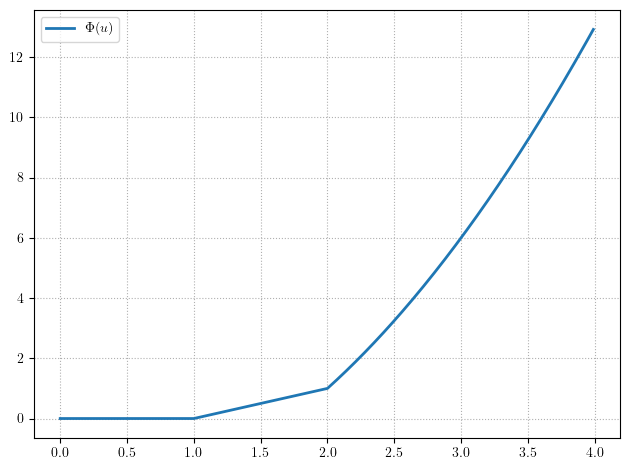

In [72]:
osm.plot_Phi(Orlicz_function, du=0.01, u_max=4, max_u_on_plots=4)

Above function may be also defined as

In [62]:
def Orlicz_function_1(u):
    res = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            res[i] = 0
        elif u[i] <= 2:
            res[i] = u[i] - 1
        else:
            res[i] = (u[i]) ** 2 - 3
    return res

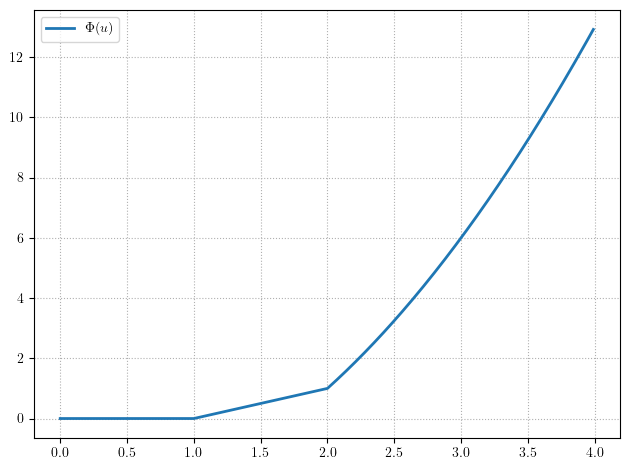

In [63]:
osm.plot_Phi(Orlicz_function_1, du=0.01, u_max=4, max_u_on_plots=4)

In [67]:
u = np.arange(0, 10, .1)  # u = [0, 0.01, 0.02, ... ,9.98, 9.99] 
Orlicz_function(u) == Orlicz_function_1(u)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [39]:
def Orlicz_function(u):
    return np.where(u <= 1, u, np.inf)

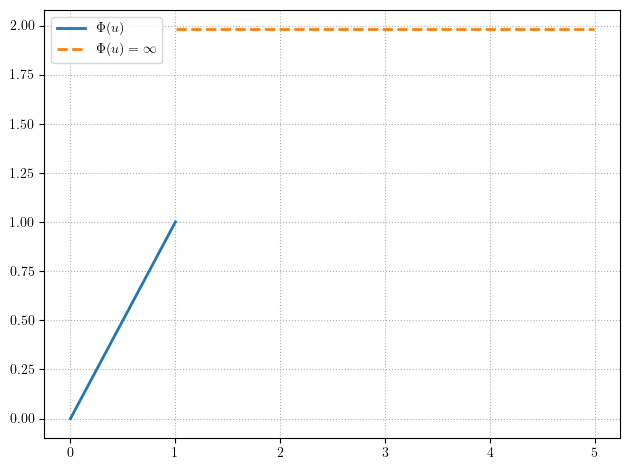

In [40]:
osm.plot_Phi(Orlicz_function, du=0.01, u_max=5, max_u_on_plots=5)

Given any Orlicz function $\Phi $ we define on $L_{0}$ the modular $I_{\Phi
} $ by
\begin{equation*}
    I_{\Phi }(x)=\int_{T}\Phi \left( x(t)\right) d\mu \cdot
\end{equation*}
Then the set
\begin{equation*}
    L_{\Phi }=\left\{ x\in L^{0}(T):I_{\Phi }(cx)<\infty  \right\}
\end{equation*}
for some $c>0$ depending on $x$ is called an *Orlicz space.* This space is usually equipped with the *Luxemburg norm*
\begin{equation*}
    \left\Vert x\right\Vert _{\Phi }=\inf \left\{ \varepsilon >0:I_{\Phi }\left(
    \frac{x}{\varepsilon }\right) \leq 1\right\}
\end{equation*}
or with the equivalent one
\begin{equation*}
    \left\Vert x\right\Vert _{\Phi }^{0}=\underset{k>0}{\inf }\frac{1}{k}\left(
    1+I_{\Phi }(kx)\right)
\end{equation*}
called the *Orlicz norm* in the *Amemiya form*.

Let's define another class of norms given by the Amemiya formula -
norms generated by the function
\begin{equation*}
s_p(u)=\left\{ \begin{array}{lll}
                   \left(1+u^p\right)^{\frac{1}{p}} & \text{if} & 1 \leq p < \infty, \\
                   \max\left\{1,u\right\}           & \text{if} & p = \infty%
\end{array}%
\right.
\end{equation*}

By the $p-$Amemiya norm of an element $x\in L_0$ we mean the norm defined by the formula
\begin{equation*}
\left\Vert x\right\Vert _{\Phi,p }=\underset{k>0}{\inf }\frac{1}{k}s_p\left(
I_{\Phi }(kx)\right) \quad \text{ for } \quad 1\leq p \leq \infty.
\end{equation*}

It is well known that for $p=1$ the $p-$Amemiya norm coincides with the Orlicz norm and
    for $p=\infty$ with the Luxemburg norm.

In [18]:
# constant function
len_t = 1
x_1 = np.zeros(shape=(2, len_t))
x_1[1, 0] = 2  #  measure of support
x_1[0, 0] = 1  # value

# support with infinite measure support
len_t = 1
x_2 = np.zeros(shape=(2, len_t))
x_2[1, 0] = np.inf  #  measure of support
x_2[0, 0] = 1  # value

len_t = 5  # 
x_3 = np.zeros(shape=(2, len_t))
for i in range(len_t):
    x_3[1, i] = i + 1  #  measure of supports
    x_3[0, i] = 1 / (i + 1)  # values

t_max = 2 * np.pi
len_t = 1000
x_4 = np.zeros(shape=(2, len_t))
x_4[1, :] = t_max / len_t  # measure of supports
for i in range(len_t):
    arg = t_max / len_t * i
    if arg <= 3:
        x_4[0, i] = np.sin(arg)  # values


Let $x\in L_{\Phi,p}.$ For any $k \in (0,\infty) $ define function
$\kappa_{p,x}(k)\colon (0,\infty) \rightarrow (0,\infty]$ by formula
\begin{equation*}
    \kappa_{p,x}(k) =  \frac{1}{k}s_p\left(I_{\Phi }(kx)\right).
\end{equation*}

Define $x$ as simple function $x(t)=\sum_{i=0}^{len\_t - 1} a_i \chi_{A_i}(t)$ as two rows numpy array, where first row is for $a_i$ and second is for $\mu(A_i)$ 

## Example of using kappa() function

In [19]:
osm.kappa(Orlicz_function, x=x_1, k=1, p_norm=1)

np.float64(3.0)

In [20]:
%%timeit
osm.kappa(Orlicz_function, x=x_1, k=1, p_norm=1)

49 μs ± 10.6 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Example of using p_Amemiya_norm() function 

In [21]:
osm.p_Amemiya_norm(Orlicz_function, x=x_1, p_norm=1)

np.float64(3.0)

In [22]:
%%timeit
osm.p_Amemiya_norm(Orlicz_function, x=x_1, p_norm=1)

16.6 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


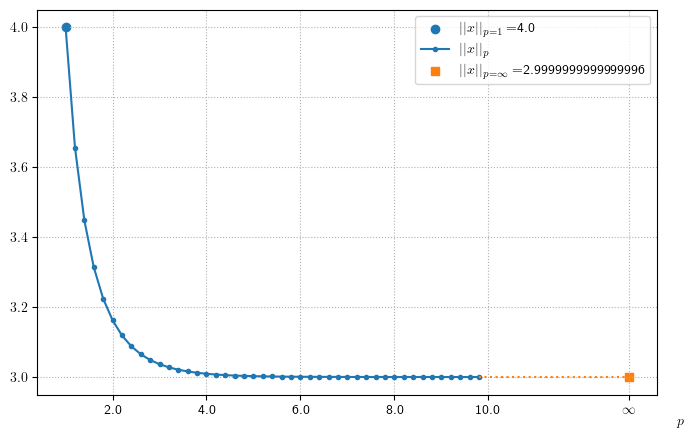

In [23]:
x = np.array([[1], [3]])
osm.plot_p_norms(Orlicz_function,
                 x=x,
                 p_min=1,
                 p_max=10,
                 dp=.2,
                 attach_inf=True,
                 figsize=(8, 5),
                 show_progress=False)

## Example of using p_Amemiya_norm_with_stars() function

Denote $k^*_{p}(x) = \inf{K_{p}(x)}$ and $k^{**}_{p}(x) = \sup{K_{p}(x)}$
(with convention $\inf \emptyset = \infty$).
Then
\begin{equation*}
K_{p}(x) =
\left\{ \begin{array}{lll}
\left[k^*_{p}(x), k^{**}_{p}(x)\right] & \text{if } & k^{**}_{p}(x)<\infty, \\
\left[k^*_{p}(x), \infty \right) & \text{if} & k^*_{p}(x)<\infty \text{ and } k^{**}_{p}(x)=\infty, \\
\emptyset & \text{if } & k^*_{p}(x)=\infty
\end{array}%
\right.
\end{equation*}
and of any $k \in K_{p}(x) $ holds
\begin{equation*}
\left\Vert x\right\Vert _{\Phi,p }=\frac{1}{k}s_p\left(
I_{\Phi }(kx)\right)
\end{equation*}
or (if $K_{p}(x) = \emptyset$ )
\begin{equation*}
\left\Vert x\right\Vert _{\Phi,p }= \lim_{k\rightarrow \infty}\frac{1}{k}s_p\left(
I_{\Phi }(kx)\right)
\end{equation*}

In [24]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1)

(np.float64(3.000110995691083),
 np.float64(0.9998890166275929),
 np.float64(0.9998890166275929))

where first result is $||x||$, second is $k_p^*(x)$ and third is $k_p^{**}(x)$

In [25]:
%%timeit
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1)

292 ms ± 34.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


example of using p_Amemiya_norm_with_stars() function with additional parameters

In [26]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1,
                              k_min=0.9,
                              k_max=1.1,
                              len_domain_k=100000, )
# show_progress=True)

(np.float64(3.0000000000026756),
 np.float64(0.9999999999973245),
 np.float64(0.9999999999973245))

In [27]:
%%timeit
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1, k_min=0.9, k_max=1.1, len_domain_k=1000)

46.8 ms ± 797 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Example of using p_Amemiya_norm_with_stars_by_decimal() function

Short explanation how decimal module works

In [28]:
print(dc.getcontext().prec)
print(dc.Decimal(0.2))
print(dc.Decimal('0.2'))
print(dc.Decimal(1) / 5)
print((dc.Decimal(np.sqrt(2))) ** 2)
print((dc.Decimal(2).sqrt()) ** 2)

dc.getcontext().prec = 50
print(dc.Decimal(0.2))
print(dc.Decimal('0.2'))
print(dc.Decimal(1) / 5)
print((dc.Decimal(np.sqrt(2))) ** 2)
print((dc.Decimal(2).sqrt()) ** 2)

28
0.200000000000000011102230246251565404236316680908203125
0.2
0.2
2.000000000000000273432346306
1.999999999999999999999999999
0.200000000000000011102230246251565404236316680908203125
0.2
0.2
2.0000000000000002734323463064769280688491650795723
1.9999999999999999999999999999999999999999999999999


Orlicz function and x must be prepared to decimal form

In [29]:
def Orlicz_function(u):
    return np.where(u <= 1, u, dc.Decimal(np.inf))


len_t = 1
x_5 = np.zeros(shape=(2, len_t), dtype=np.dtype('object'))
x_5[1, 0] = dc.Decimal(2)  #  measure of support
x_5[0, 0] = dc.Decimal(1)  # value
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=1)

(Decimal('3.1110988766779245797415719566910102134319832100514'),
 Decimal('0.90000991'),
 Decimal('0.90000991'))

In [30]:
%%timeit
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=1)

56.6 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


example of using p_Amemiya_norm_with_stars_by_decimal() function with additional parameters

In [31]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=dc.Decimal(1),
                                         k_min=dc.Decimal('0.9'),
                                         k_max=dc.Decimal('1.1'),
                                         len_domain_k=10000, )
# show_progress=True)

(Decimal('3.00000'), Decimal('1.00000'), Decimal('1.00000'))

In [32]:
%%timeit
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=dc.Decimal(1),
                                         k_min=dc.Decimal('0.9'),
                                         k_max=dc.Decimal('1.1'),
                                         len_domain_k=1000
                                         )

74.9 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In the next example there is false $k_p^{*}(x)$ less than $k_p^{**}(x)$

In [33]:
def Orlicz_function(u):
    return np.where(u <= 1, u, 2 * u - 1)


x = np.array([[1], [3]])


In [34]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=20)

(np.float64(3.0000000000430616),
 np.float64(0.64823266269593),
 np.float64(0.9999516967001615))

In [35]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x, p_norm=dc.Decimal(10))

(Decimal('3.0000145688845555222000227125563249652936039015189'),
 Decimal('0.90000991'),
 Decimal('0.90000991'))

For better accuracy we may reduce domain by

In [36]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=20,
                              k_min=0.45,
                              k_max=1.05)

(np.float64(3.0000000000433653),
 np.float64(0.6671999999999962),
 np.float64(0.9995999999999903))

In [37]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x, p_norm=dc.Decimal(10),
                                         k_min=dc.Decimal(45) / 100,
                                         k_max=dc.Decimal(105) / 100)

(Decimal('3.0000051008541999106151967575520682494068505040605'),
 Decimal('0.9996'),
 Decimal('0.9996'))